### 專案：Task_04_Descriptive_Stats - Bonus 視覺化分析
### Project: Task_04_Descriptive_Stats - Bonus Visual Analysis

 說明：此腳本用於對 2024 美國總統大選社群媒體資料集進行探索性資料分析（EDA），
      並產生多個視覺化圖表來揭示資料背後的故事與洞見。
 Description: This script performs exploratory data analysis (EDA) on the 2024 US
              Presidential Election social media dataset, generating various
              visualizations to uncover stories and insights from the data.

In [2]:
# === 1. 環境設定與資料載入 (Setup and Data Loading) ===

# 匯入必要的函式庫
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# --- 圖表樣式設定 (Chart Style Configuration) ---
sns.set_theme(style="whitegrid")
# 設定字體以正確顯示中文
# Set fonts to correctly display Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Heiti TC', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# --- 資料載入與欄位驗證 (Data Loading and Column Validation) ---

# 請確認你的 CSV 檔名是否正確
# Please ensure your CSV filename is correct
FILE_PATH = '2024_fb_ads_president_scored_anon.csv' 
# *** 使用者提供的正確欄位名稱 ***
# *** Correct column names provided by the user ***
SPEND_COLUMN = 'estimated_spend'
PAGE_COLUMN = 'bylines'
PLATFORM_COLUMN = 'publisher_platforms'
DEMOGRAPHICS_COLUMN = 'demographic_distribution'


print(f"--- 正在載入資料: {FILE_PATH} ---")
print(f"--- Loading data from: {FILE_PATH} ---")

df = pd.read_csv(FILE_PATH, low_memory=False)

# 進行資料清理前，先驗證核心欄位是否存在
# Before cleaning, validate that core columns exist
required_columns = [SPEND_COLUMN, PAGE_COLUMN, PLATFORM_COLUMN, DEMOGRAPHICS_COLUMN]
if not all(col in df.columns for col in required_columns):
    print("錯誤：CSV 檔案中缺少必要的欄位。請檢查以下欄位是否存在：")
    print(f"Error: The CSV file is missing required columns. Please check for: {required_columns}")
    print("\n您檔案中實際的欄位為 (Actual columns in your file are):")
    print(list(df.columns))
    exit() # 終止程式

# --- 資料清理與轉型 (Data Cleaning and Transformation) ---
# 將花費欄位轉為數值
# Convert the spend column to a numeric type
df[SPEND_COLUMN] = pd.to_numeric(df[SPEND_COLUMN], errors='coerce')

# 定義一個安全的函式來解析字串
# Define a safe function to parse strings
def safe_literal_eval(val):
    try:
        if isinstance(val, str):
            return ast.literal_eval(val)
        return None
    except (ValueError, SyntaxError):
        return None

print("--- 資料載入與驗證完畢，開始分析 ---")
print("--- Data loaded and validated. Starting analysis ---")

--- 正在載入資料: 2024_fb_ads_president_scored_anon.csv ---
--- Loading data from: 2024_fb_ads_president_scored_anon.csv ---
--- 資料載入與驗證完畢，開始分析 ---
--- Data loaded and validated. Starting analysis ---



--- 執行分析 2: 廣告主題熱度 ---
--- Running Analysis 2: Ad Topic Frequency ---


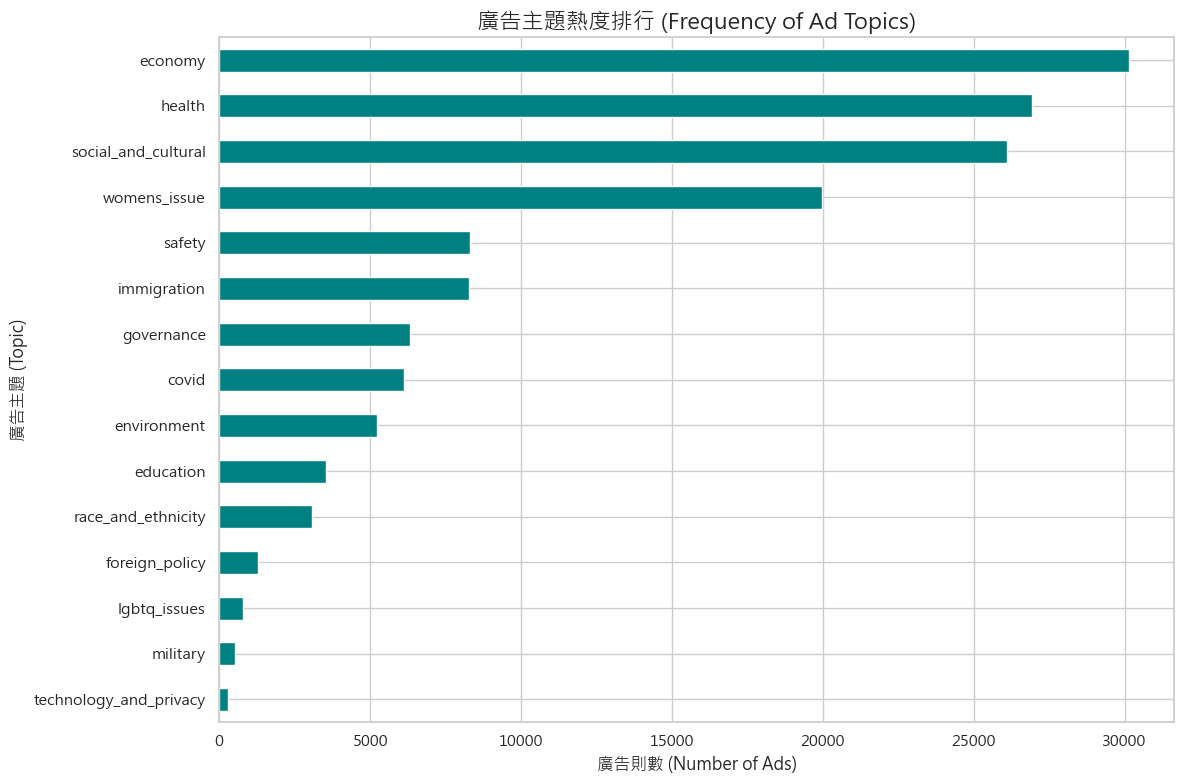

In [3]:
# === 2. 廣告主題熱度分析 (Ad Topic Frequency Analysis) ===
print("\n--- 執行分析 2: 廣告主題熱度 ---")
print("--- Running Analysis 2: Ad Topic Frequency ---")

# 找出所有代表主題的欄位 ('..._topic_illuminating')
# Find all columns representing topics ('..._topic_illuminating')
topic_columns = [col for col in df.columns if 'topic_illuminating' in col]

if topic_columns:
    topic_counts = df[topic_columns].sum().sort_values(ascending=True)
    # 移除欄位名稱中的後綴，讓圖表更簡潔
    # Remove suffixes from column names for cleaner chart labels
    topic_counts.index = topic_counts.index.str.replace('_topic_illuminating', '')

    plt.figure(figsize=(12, 8))
    topic_counts.plot(kind='barh', color='teal')
    plt.title('廣告主題熱度排行 (Frequency of Ad Topics)', fontsize=16)
    plt.xlabel('廣告則數 (Number of Ads)', fontsize=12)
    plt.ylabel('廣告主題 (Topic)', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("找不到主題相關欄位，跳過此分析。")
    print("No topic-related columns found, skipping this analysis.")


--- 執行分析 3: 不同主題的廣告花費 ---
--- Running Analysis 3: Ad Spend by Topic ---


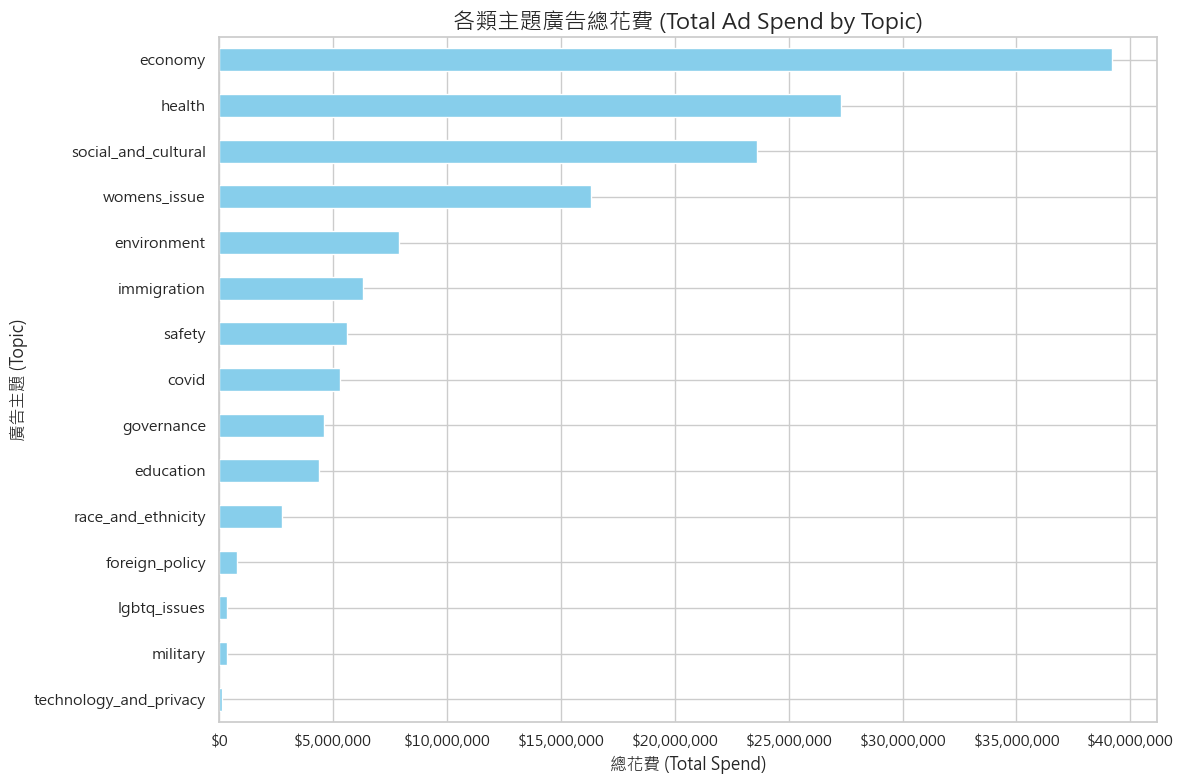

In [4]:
# === 3. 不同主題的廣告花費分析 (Ad Spend by Topic Analysis) ===
print("\n--- 執行分析 3: 不同主題的廣告花費 ---")
print("--- Running Analysis 3: Ad Spend by Topic ---")

if topic_columns:
    spend_by_topic = {}
    for topic in topic_columns:
        total_spend = df[df[topic] == 1][SPEND_COLUMN].sum()
        # 清理欄位名稱以作為字典的鍵
        # Clean up column name for use as a dictionary key
        clean_topic_name = topic.replace('_topic_illuminating', '')
        spend_by_topic[clean_topic_name] = total_spend

    spend_series = pd.Series(spend_by_topic).sort_values()

    plt.figure(figsize=(12, 8))
    spend_series.plot(kind='barh', color='skyblue')
    plt.title('各類主題廣告總花費 (Total Ad Spend by Topic)', fontsize=16)
    plt.xlabel(f'總花費 (Total Spend)', fontsize=12)
    plt.ylabel('廣告主題 (Topic)', fontsize=12)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    plt.tight_layout()
    plt.show()